In [2]:
!pip install datasets
!pip install transformers
!pip install torch
!pip install lancedb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [3]:
from datasets import load_dataset

imagedata = load_dataset("uoft-cs/cifar100", split="test")

imagedata

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['img', 'fine_label', 'coarse_label'],
    num_rows: 10000
})

In [ ]:
set(imagedata["fine_label"])

In [5]:
# labels names
labels = imagedata.info.features["fine_label"].names
print(len(labels))
labels

100


['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'cra',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tige

In [6]:
# generate sentences
clip_labels = [f"This is an image for {label}" for label in labels]
clip_labels

['This is an image for apple',
 'This is an image for aquarium_fish',
 'This is an image for baby',
 'This is an image for bear',
 'This is an image for beaver',
 'This is an image for bed',
 'This is an image for bee',
 'This is an image for beetle',
 'This is an image for bicycle',
 'This is an image for bottle',
 'This is an image for bowl',
 'This is an image for boy',
 'This is an image for bridge',
 'This is an image for bus',
 'This is an image for butterfly',
 'This is an image for camel',
 'This is an image for can',
 'This is an image for castle',
 'This is an image for caterpillar',
 'This is an image for cattle',
 'This is an image for chair',
 'This is an image for chimpanzee',
 'This is an image for clock',
 'This is an image for cloud',
 'This is an image for cockroach',
 'This is an image for couch',
 'This is an image for cra',
 'This is an image for crocodile',
 'This is an image for cup',
 'This is an image for dinosaur',
 'This is an image for dolphin',
 'This is an

In [7]:
# initialization
from transformers import CLIPProcessor, CLIPModel

model_id = "openai/clip-vit-large-patch14"

processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [8]:
import torch

# if you have CUDA set it to the active device like this
device = "cuda" if torch.cuda.is_available() else "cpu"
# move the model to the device
model.to(device)

device

'cpu'

In [9]:
# create label tokens
label_tokens = processor(text=clip_labels, padding=True, return_tensors="pt").to(device)

# Print the label tokens with the corresponding text
for i in range(5):
    token_ids = label_tokens["input_ids"][i]
    print(
        f"Token ID : {token_ids}, Text : {processor.decode(token_ids, skip_special_tokens=False)}"
    )

Token ID : tensor([49406,   589,   533,   550,  2867,   556,  3055, 49407, 49407, 49407]), Text : <|startoftext|>this is an image for apple <|endoftext|><|endoftext|><|endoftext|>
Token ID : tensor([49406,   589,   533,   550,  2867,   556, 16814,   318,  2759, 49407]), Text : <|startoftext|>this is an image for aquarium _ fish <|endoftext|>
Token ID : tensor([49406,   589,   533,   550,  2867,   556,  1794, 49407, 49407, 49407]), Text : <|startoftext|>this is an image for baby <|endoftext|><|endoftext|><|endoftext|>
Token ID : tensor([49406,   589,   533,   550,  2867,   556,  4298, 49407, 49407, 49407]), Text : <|startoftext|>this is an image for bear <|endoftext|><|endoftext|><|endoftext|>
Token ID : tensor([49406,   589,   533,   550,  2867,   556, 22874, 49407, 49407, 49407]), Text : <|startoftext|>this is an image for beaver <|endoftext|><|endoftext|><|endoftext|>


## Creating the embeddings!

When you're working with zero-shot image classification using CLIP (Contrastive Language-Image Pre-Training), you're essentially leveraging the ability of the CLIP model to understand both images and text by mapping them into a shared embedding space. This shared space allows the model to compute the similarity between text and image embeddings, making it ideal for zero-shot tasks.

Given that you're using CLIP for zero-shot classification, it's important to use the embeddings generated by the CLIP model for both images and text. The reason for this is that CLIP has been specifically trained to align these two modalities (text and images) in the same embedding space. Using different embeddings would break this alignment and undermine the model's ability to perform zero-shot classification effectively.

However, if you want to explore other embeddings, you could consider using different pre-trained models for other tasks or experiments, but for the zero-shot classification task with CLIP, sticking with the CLIP-generated embeddings is essential.

In [10]:
print(label_tokens)

{'input_ids': tensor([[49406,   589,   533,   550,  2867,   556,  3055, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556, 16814,   318,  2759, 49407],
        [49406,   589,   533,   550,  2867,   556,  1794, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556,  4298, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556, 22874, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556,  2722, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556,  5028, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556, 16534, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556, 11652, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556,  5392, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556,  3814, 49407, 49407, 49407],
        [49406,   589,   533,   550,  2867,   556,  1876, 49407, 49407, 49407],
        [49406,   589,   5

In [11]:
# encode tokens to sentence embeddings from CLIP

with torch.no_grad():
    label_emb = model.get_text_features(
        **label_tokens
    )  # passing the label text as in "a photo of a cat" to get it's relevant embedding from clip model

# Move embeddings to CPU and convert to numpy array
label_emb = label_emb.detach().cpu().numpy()
label_emb.shape

(100, 768)

We got the 768 dimensional vector for each of our 10 text classes sentences.

Now there needs to be the normalizing the embeddings to make sure we get the better results when we are doing the dot product, and we can do this by dividing each of the vectors by the square root of the sum of the squares of each of the vectors.

In [12]:
label_emb.min(), label_emb.max()

(-15.682584, 13.341022)

In [13]:
import numpy as np

# normalization
label_emb = label_emb / np.linalg.norm(label_emb, axis=0)
label_emb.min(), label_emb.max()

(-0.3624336, 0.39170283)

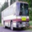

In [14]:
import random

index = random.randint(0, len(imagedata) - 1)
selected_image = imagedata[index]["img"]
selected_image

In [15]:
image = processor(text=None, images=imagedata[index]["img"], return_tensors="pt")[
    "pixel_values"
].to(device)
image.shape

torch.Size([1, 3, 224, 224])

In [16]:
image

tensor([[[[ 1.7844,  1.7844,  1.7844,  ..., -1.2083, -1.2083, -1.2083],
          [ 1.7990,  1.7990,  1.7990,  ..., -1.2229, -1.2229, -1.2083],
          [ 1.7990,  1.7990,  1.7990,  ..., -1.2229, -1.2229, -1.2229],
          ...,
          [ 0.6603,  0.6603,  0.6603,  ...,  0.4997,  0.5143,  0.5143],
          [ 0.6603,  0.6603,  0.6603,  ...,  0.5143,  0.5289,  0.5289],
          [ 0.6603,  0.6603,  0.6603,  ...,  0.5289,  0.5435,  0.5435]],

         [[ 2.0149,  2.0149,  2.0149,  ..., -0.9267, -0.9267, -0.9267],
          [ 2.0149,  2.0149,  2.0149,  ..., -0.9267, -0.9267, -0.9267],
          [ 2.0149,  2.0149,  2.0149,  ..., -0.9417, -0.9417, -0.9417],
          ...,
          [ 0.5741,  0.5741,  0.5741,  ...,  0.5891,  0.6041,  0.6041],
          [ 0.5741,  0.5741,  0.5741,  ...,  0.5891,  0.6041,  0.6041],
          [ 0.5741,  0.5741,  0.5741,  ...,  0.5891,  0.6041,  0.6041]],

         [[ 2.1032,  2.1032,  2.1032,  ..., -1.0252, -1.0252, -1.0252],
          [ 2.1032,  2.1032,  

In [17]:
img_emb = model.get_image_features(image)
img_emb.shape

torch.Size([1, 768])

In [18]:
import lancedb
import numpy as np

data = []
for label_name, embedding in zip(labels, label_emb):
    data.append({"label": label_name, "vector": embedding})

db = lancedb.connect("./.lancedb")
table = db.create_table("my_table", data, mode="Overwrite")

# Prepare the query embedding
query_embedding = img_emb.squeeze().detach().cpu().numpy()
# Perform the search
results = table.search(query_embedding).limit(10).to_pandas()

print(results.head(n=10))

           label                                             vector  \
0            bus  [0.022191629, 0.15996626, 0.13757694, 0.058719...   
1          train  [-0.025220517, 0.11286947, 0.12789312, 0.01722...   
2           road  [-0.052865148, 0.13100702, 0.16935337, -0.0592...   
3  aquarium_fish  [-0.007917204, 0.15597954, -0.0052733854, 0.07...   
4   pickup_truck  [0.08430549, 0.090862826, 0.07901725, -0.23153...   
5       mountain  [-0.026367433, 0.12044583, 0.050345775, 0.0273...   
6      telephone  [0.17053358, 0.18755479, 0.10471857, 0.0254959...   
7        bicycle  [0.033512242, -0.05071287, 0.088322446, 0.1234...   
8          plain  [0.0394026, 0.13996188, 0.11271955, -0.0268946...   
9          whale  [0.10277067, 0.050650656, 0.010288065, -0.0908...   

    _distance  
0  439.172211  
1  446.832275  
2  449.517883  
3  449.519348  
4  449.607666  
5  449.909271  
6  450.536194  
7  450.587311  
8  450.887573  
9  450.944214  
